In [4]:
%load_ext autoreload
%autoreload 2

import json
from dwitracts.glm import DwiTractsGlm
import dwitracts.plot as dwiplot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# GLM Analysis using DwiTractsGlm class

config_file = 'project_full/config_glm_dmn.json'

with open(config_file, 'r') as myfile:
    params = json.loads(myfile.read())
    
params_gen = params['general']
params_glm = params['glm']

with open(params_gen['tracts_config_file'], 'r') as myfile:
    json_string=myfile.read()
    
params['tracts'] = json.loads(json_string)

with open(params_gen['preproc_config_file'], 'r') as myfile:
    json_string=myfile.read()
    
params['preproc'] = json.loads(json_string)

my_glm = DwiTractsGlm( params )

# Initialize the object with the current parameters
assert my_glm.initialize( )


Creating debug directory at /Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/dmn/debug
Tract not found: /Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/dmn/final/tract_final_bidir_ACC_L_PCG_R.nii.gz
Tract not found: /Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/dmn/final/tract_final_bidir_LOC_R_PFCm_L.nii.gz
Tract not found: /Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/dmn/final/tract_final_bidir_PCm_L_PFCm_L.nii.gz


In [41]:
# Fit all specified GLMs and save results to target directory
assert my_glm.fit_glms( clobber=True, verbose=True )


Computing GLMs for 43 tracts.
Writing results to /Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/what-where/glms/glm-age-sex.


   Processing IPL_L_gwfa_IPL_R_gwfa


FileNotFoundError: No such file or no access: '/Volumes/GDriveUsb10TB/data/nki/derivatives/sub-A00033735/ses-DS2/dwi/regress_dwi/what-where/betas_mni_sm_1500um_IPL_L_gwfa_IPL_R_gwfa.nii.gz'

In [49]:
# Extract distance traces from the GLM results
assert my_glm.extract_distance_traces( clobber=True, verbose=True )


Evaluating IPL_L_gwfa_IPL_R_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_IPS_L_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_IPS_R_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_SPL_L_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_SPL_R_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_dPMC_L_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_dPMC_R_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_vPMC_L_gwfa
   Done glm-age-sex
Evaluating IPL_L_gwfa_vPMC_R_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_IPS_L_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_IPS_R_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_SPL_L_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_SPL_R_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_dPMC_L_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_dPMC_R_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_vPMC_L_gwfa
   Done glm-age-sex
Evaluating IPL_R_gwfa_vPMC_R_gwfa
   Done glm-age-sex
Evaluating IPS_L_gwfa_IPS_R_gwfa
   Done glm-age-sex
Evaluating IPS_L_gwfa_SPL_L_gwfa
   Do

In [50]:
# Extract distance traces from the GLM results, using RFT1D cluster inference
assert my_glm.extract_distance_traces_rft1d( clobber=True, verbose=True, debug=True )



glm-age-sex
 Age
   No output for SPL_L_gwfa_SPL_R_gwfa. Skipping.
    Mean FWHM is 4.24393



 Sex
   No output for SPL_L_gwfa_SPL_R_gwfa. Skipping.
    Mean FWHM is 4.24393



 Age*Sex
   No output for SPL_L_gwfa_SPL_R_gwfa. Skipping.
    Mean FWHM is 4.24393



   Wrote volumes & polylines.
 Wrote results to /Volumes/GDriveUsb/data/nki/tract_stats_noz/what-where/glms/glm-age-sex/summary-max_thr50/tcounts-rft.csv


In [ ]:
# Extract distance traces from the GLM results, using cluster inference and permutation testing
# my_glm.extract_distance_trace_clusters( clobber=True, verbose=True, debug=True )


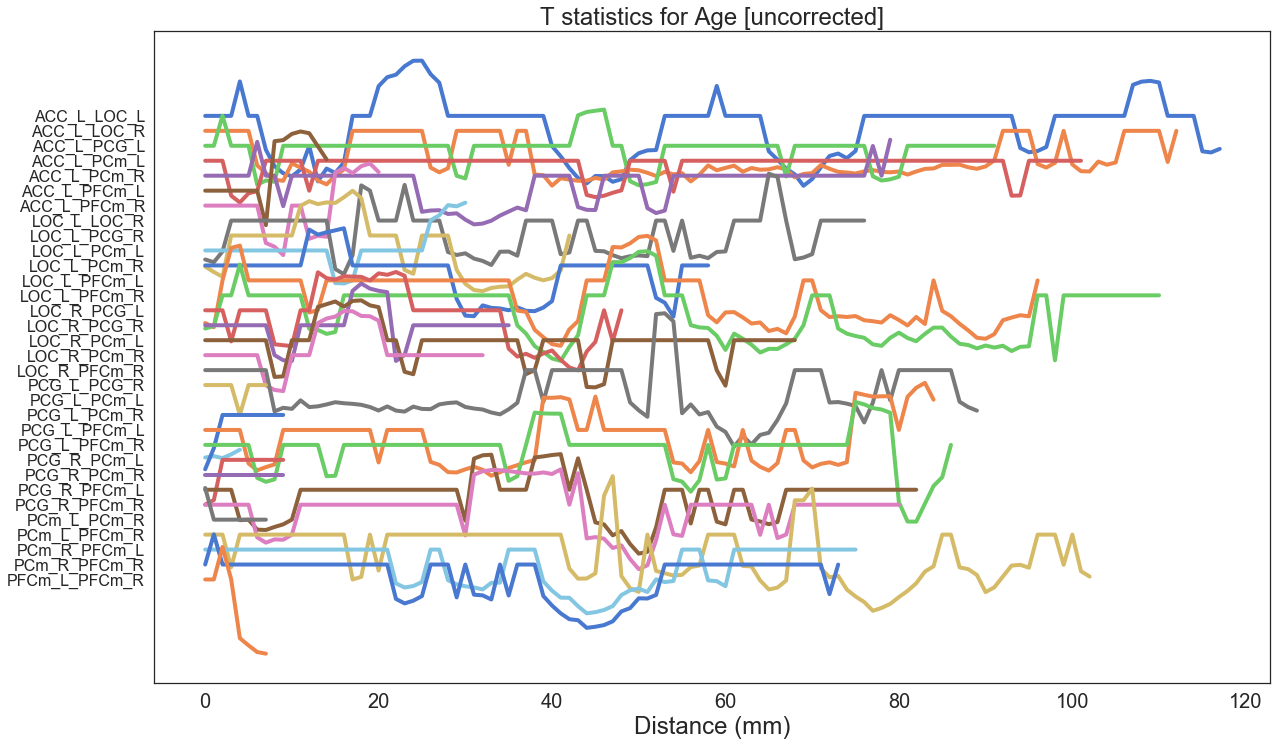

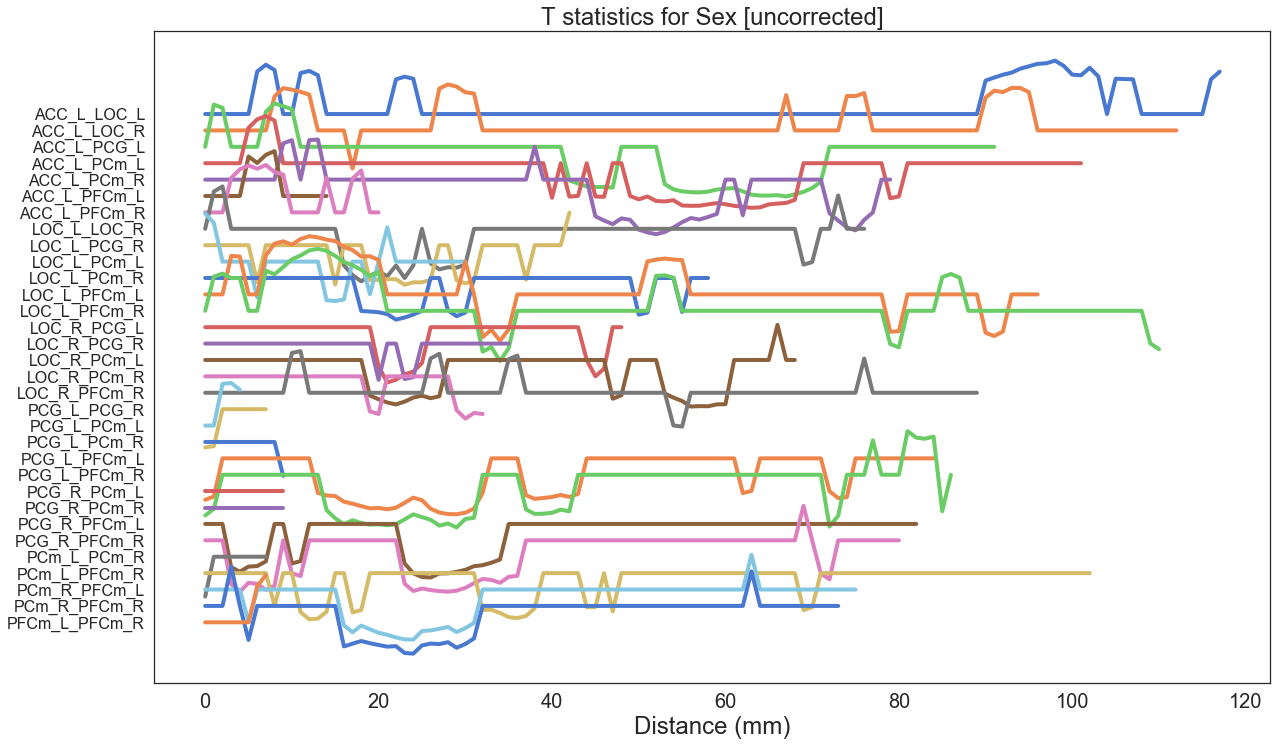

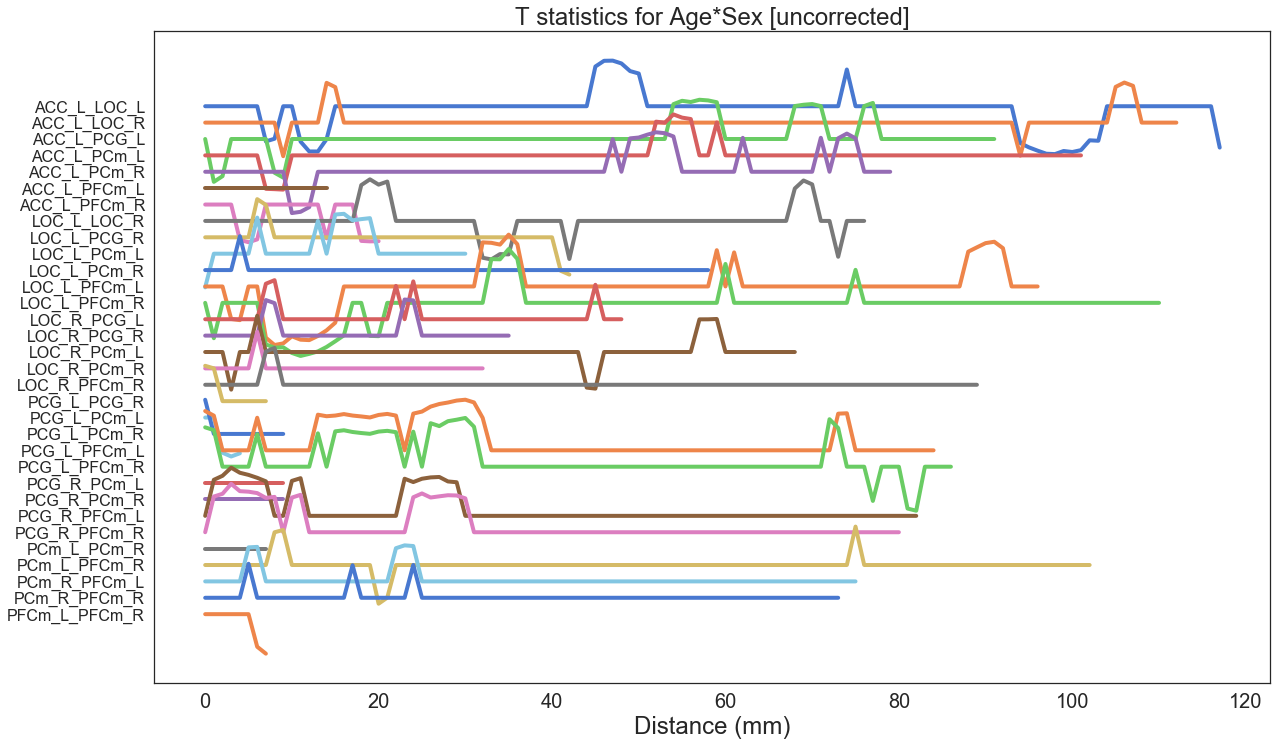

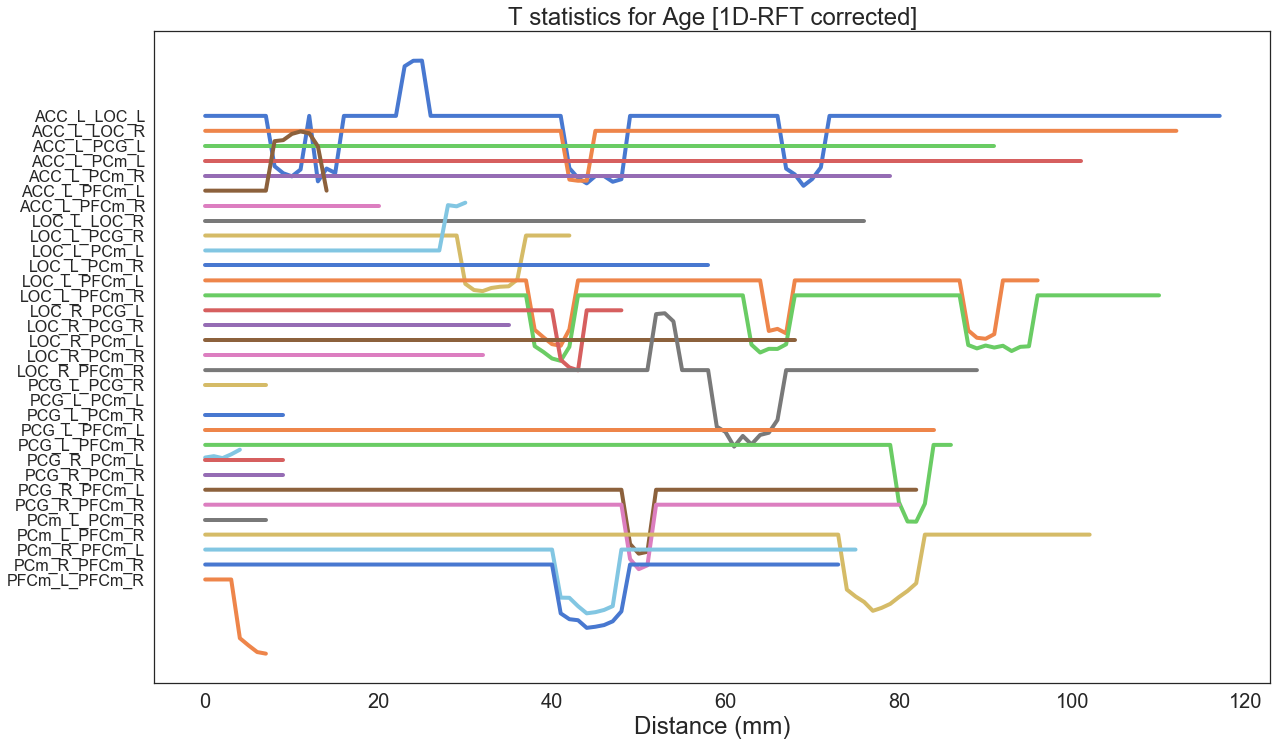

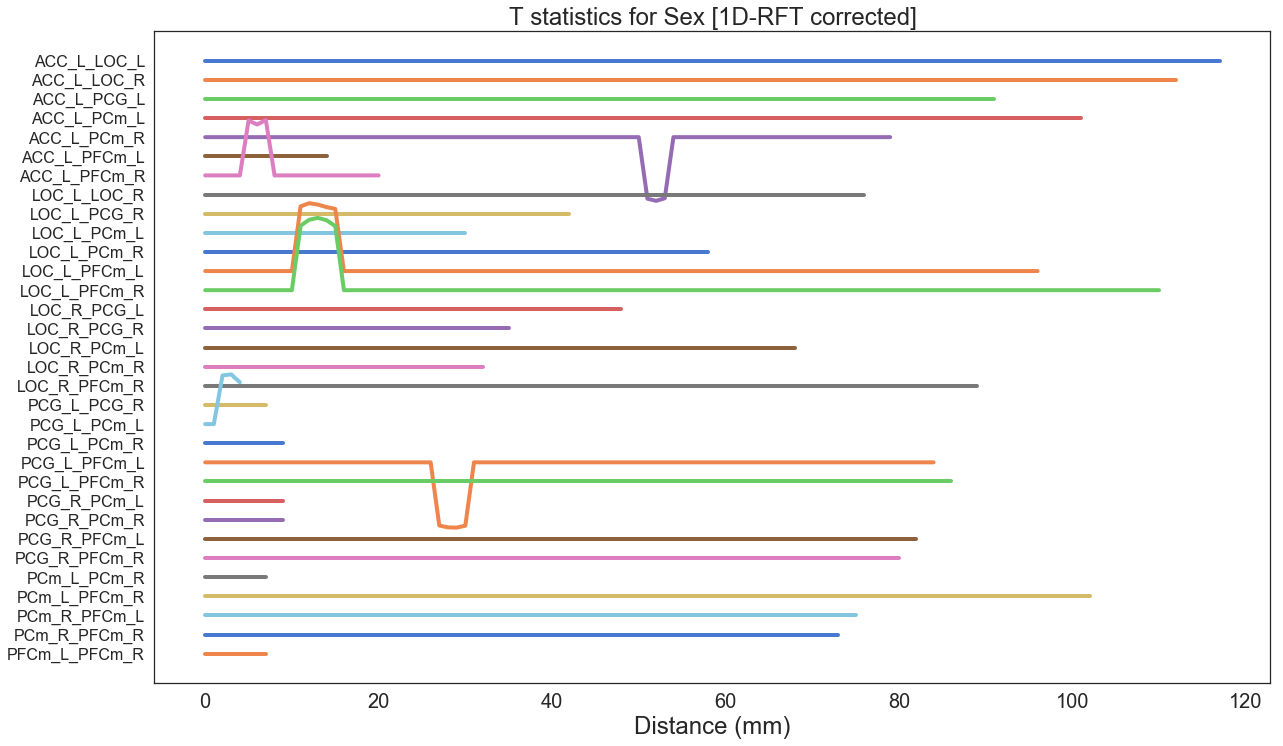

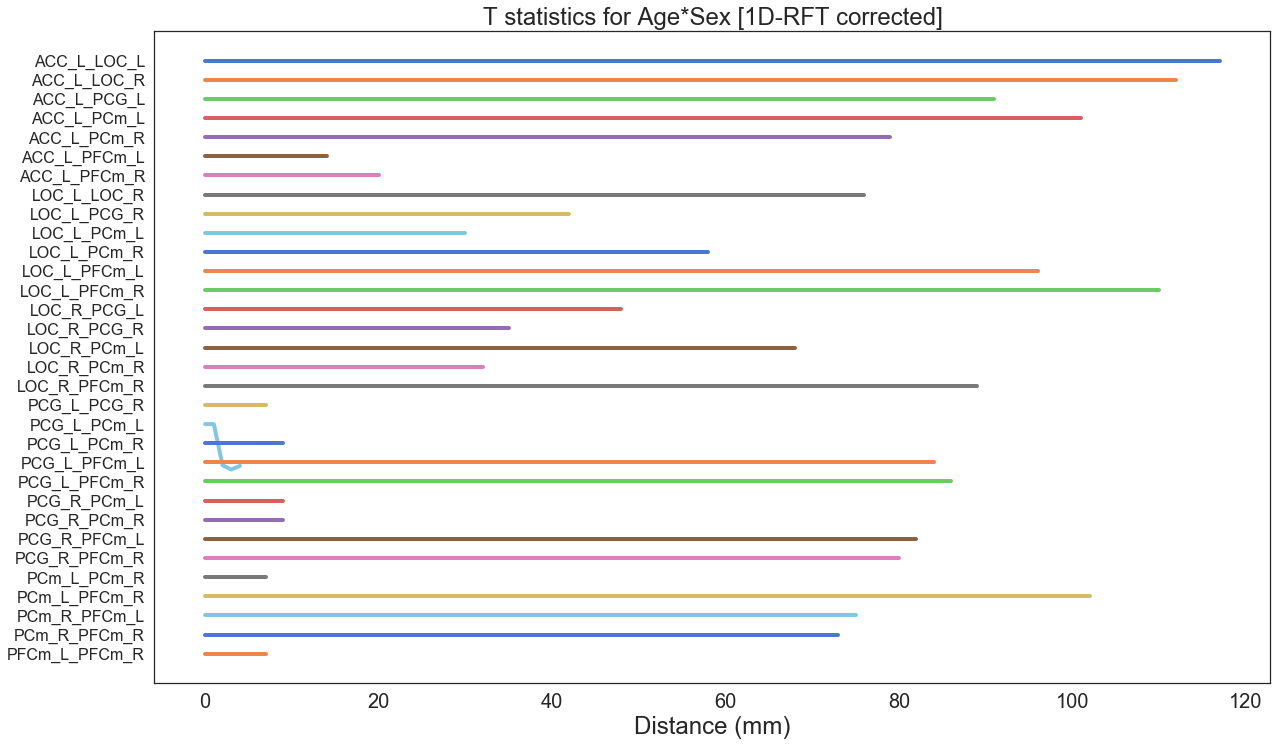

In [68]:
# Plot t-value distance traces

# Font sizes
params['axis_font'] = 24
params['yticklabel_font'] = 16
params['xticklabel_font'] = 20
params['title_font'] = 40
params['font_scale'] = 1.5
params['image_format'] = 'svg'
params['alpha'] = 0.05
params['write_data'] = True

alpha = 0.05

tract_names = my_glm.tract_names.copy()
tract_names.sort()

# Uncorrected
params['stat_type'] = 'uncorrected'
dwiplot.plot_distance_traces( params, tract_names )

# RFT corrected
params['stat_type'] = 'rft'
dwiplot.plot_distance_traces( params, tract_names )

# Permutation corrected
# dwiplot.plot_distance_traces( params, tract_names, alpha=alpha, stat_type='perm' )


In [ ]:
# Plot scatterplots & violin plots for GLM results

# Specify GLM
glm = 'glm-age-sex'

# Set up parameters
params_plot = {}
params_plot['glm'] = glm
params_plot['alpha'] = 0.05
params_plot['outlier_z'] = params_glm[glm]['outlier_z']
params_plot['stat_type'] = 'rft'
params_plot['axis_font'] = 40
params_plot['marker_size'] = 15
params_plot['line_width'] = 4
params_plot['ticklabel_font'] = 33
params_plot['title_font'] = 45
params_plot['legend_font'] = 40
params_plot['legend_scale'] = 3
params_plot['show_title'] = True
params_plot['show_legend'] = True
params_plot['dimensions'] = (12,10)
params_plot['font_scale'] = 0.6
params_plot['write_csv'] = False
params_plot['image_format'] = 'svg'
params_plot['write_data'] = True

# Loop through tracts and call plot function for each
dwiplot.plot_glm_results_all( params_plot, my_glm, verbose=True )
    

Tract ACC_L_LOC_L
Tract ACC_L_LOC_R
Tract ACC_L_PCG_L
Tract ACC_L_PCm_L
  ACC_L_PCm_R [Sex]: Removed 1 outliers.
Tract ACC_L_PCm_R
Tract ACC_L_PFCm_L
Tract ACC_L_PFCm_R
Tract LOC_L_LOC_R
Tract not found: LOC_L_PCG_L
Tract LOC_L_PCG_L failed
Tract LOC_L_PCG_R
  LOC_L_PCm_L [Age]: Removed 1 outliers.
Tract LOC_L_PCm_L
Tract LOC_L_PCm_R
Tract LOC_L_PFCm_L
Tract LOC_L_PFCm_R
Tract LOC_R_PCG_L
Tract LOC_R_PCG_R
Tract LOC_R_PCm_L
Tract LOC_R_PCm_R
  LOC_R_PFCm_R [Age]: Removed 1 outliers.
Tract LOC_R_PFCm_R
Tract PCG_L_PCG_R
  PCG_L_PCm_L [Age]: Removed 1 outliers.
  PCG_L_PCm_L [Sex]: Removed 1 outliers.
  PCG_L_PCm_L [Age*Sex]: Removed 1 outliers.
/Volumes/GDriveUsb10TB/data/nki/tract_stats_noz/dmn/glms/glm-age-sex/figures/scatter_AgeXSex_PCG_L_PCm_L_rft.svg
Tract PCG_L_PCm_L
Tract PCG_L_PCm_R
  PCG_L_PFCm_L [Sex]: Removed 1 outliers.
Tract PCG_L_PFCm_L
Tract PCG_L_PFCm_R
Tract PCG_R_PCm_L
Tract PCG_R_PCm_R
Tract PCG_R_PFCm_L
Tract PCG_R_PFCm_R
Tract PCm_L_PCm_R
  PCm_L_PFCm_R [Age]: Remov

In [ ]:
# Aggregate tracts into single volumes
assert my_glm.aggregate_tracts(prefix='tract_final_norm_bidir', op='max', verbose=True)


In [ ]:
# Aggregate tracts crossing corpus callosum
cc_img = '/Volumes/GDriveUsb/data/atlases/corpus_callosum_midline.nii'
assert my_glm.aggregate_tracts(prefix='tract_final_norm_bidir', suffix='_cc', intersects=cc_img, \
                                op='max', threshold=0, verbose=True)


In [ ]:
# Aggregate stats into single volumes

assert my_glm.aggregate_stats( op='max', pthres=0.05, suffix='-rft', verbose=True, clobber=True )


In [ ]:
# Generate Pajek graphs

assert my_glm.create_pajek_graphs( suffix='-rft', edge_val='tsum', verbose=True, clobber=True )
